In [143]:
import pandas as pd
#vamos importar os dados
url= 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url)
dados.head(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [144]:
# vamos renomear as colunas porque não gostamos de termos e inglês nos códigos
mapa={
    'mileage_per_year': 'Milhas_por_ano',
    'model_year': 'Ano_modelo',
    'price': 'Preco',
    'sold': 'Vendido'
     }

dados = dados.rename(columns = mapa)
dados.head(5)

,Unnamed: 0,Milhas_por_ano,Ano_modelo,Preco,Vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [145]:
trocas = {
    'yes': 1,
    'no':  0
         }

dados['Vendido']=dados.Vendido.map(trocas)
dados.head(5)

,Unnamed: 0,Milhas_por_ano,Ano_modelo,Preco,Vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [146]:
from datetime import datetime

ano_atual=datetime.today().year
dados['Idade_do_modelo']=ano_atual-dados.Ano_modelo
dados.head(5)

,Unnamed: 0,Milhas_por_ano,Ano_modelo,Preco,Vendido,Idade_do_modelo
0,0,21801,2000,30941.02,1,25
1,1,7843,1998,40557.96,1,27
2,2,7109,2006,89627.50,0,19
3,3,26823,2015,95276.14,0,10
4,4,7935,2014,117384.68,1,11


In [147]:
dados['km_por_ano']=dados.Milhas_por_ano*1.60934

dados.head(5)

,Unnamed: 0,Milhas_por_ano,Ano_modelo,Preco,Vendido,Idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,25,35085.22134
1,1,7843,1998,40557.96,1,27,12622.05362
2,2,7109,2006,89627.50,0,19,11440.79806
3,3,26823,2015,95276.14,0,10,43167.32682
4,4,7935,2014,117384.68,1,11,12770.11290


In [148]:
dados=dados.drop(columns=['Unnamed: 0','Milhas_por_ano','Ano_modelo'],axis=1)
dados.head(5)

,Preco,Vendido,Idade_do_modelo,km_por_ano
0,30941.02,1,25,35085.22134
1,40557.96,1,27,12622.05362
2,89627.50,0,19,11440.79806
3,95276.14,0,10,43167.32682
4,117384.68,1,11,12770.11290


In [149]:
x = dados[['Preco','km_por_ano','km_por_ano' ]]
y = dados['Vendido']

In [151]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5 # tirar a aleatóro do treino e do teste.
np.random.seed(SEED)
treino_x,teste_x,treino_y,teste_y= train_test_split(x,y,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )


Treinaremos com 7500 elementos e testaremos com 2500 elementos
Taxa de acerto foi de : 60.64%


In [152]:
# base line - Vamos criar

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x,teste_y)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

#taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )

Taxa de acerto foi de : 60.64%


In [153]:

from sklearn.dummy import DummyClassifier

dummy_mostfreq= DummyClassifier()
dummy_mostfreq.fit(treino_x, treino_y)
previsoes = dummy_mostfreq.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )

Taxa de acerto foi de : 58.0%


In [154]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5 # tirar a aleatóro do treino e do teste.
np.random.seed(SEED)
raw_treino_x,raw_teste_x,treino_y,teste_y= train_test_split(x,y,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
scaler.fit(teste_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Taxa de acerto foi de : 77.68%


In [160]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5 # tirar a aleatóro do treino e do teste.
np.random.seed(SEED)
raw_treino_x,raw_teste_x,treino_y,teste_y= train_test_split(x,y,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#scaler = StandardScaler()
#scaler.fit(raw_treino_x)
#scaler.fit(teste_x)
#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_treino_x, treino_y)
previsoes = model.predict(raw_teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Taxa de acerto foi de : 79.28%


In [156]:

!pip install graphviz

!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


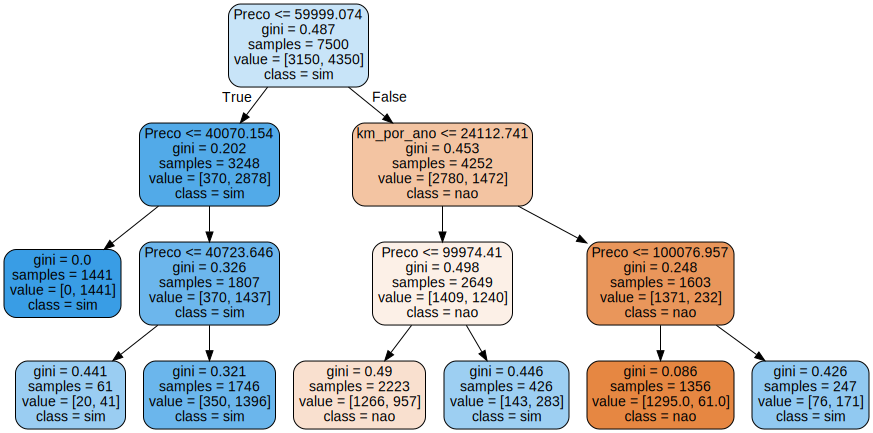

In [161]:

from sklearn.tree import export_graphviz
import  graphviz
features=x.columns
dot_data =export_graphviz(model, out_file=None,
                          filled = True, rounded = True,
                          feature_names = features,
                          class_names=['nao','sim'])
grafico = graphviz.Source(dot_data)
grafico